<a href="https://colab.research.google.com/github/Vilasini-R/aiml-lab-7/blob/main/Copy_of_AIML_III_Module_02_Lab_01_Basic_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2: Appreciating, Interpreting and Visualizing Data
## Lab 1: Basic Plots
---

<!-- In this lab you will learn how to visualize a dataset and the various tools that can you help you do this. -->

It is often said **Data is only as good as it is presented**. Countless studies show how our brain is wired for the visual, and processes everything faster when it is through the eye. Therefore it becomes increasingly important to be able to APPRECIATE, INTERPRET and VISUALIZE data even before we start writing any form of code to process it.


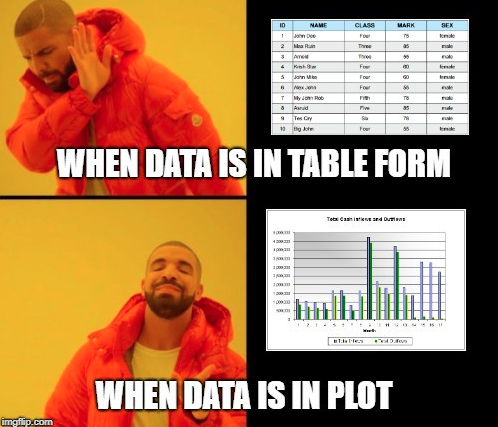

In this lab, you will learn simple ways to visualize your data using commonly-used libraries. Understanding the plots would further help in decoding the various features in the dataset and their impact on the target variables.

Data visualizations in Python can be done via many packages. We’ll be discussing first the *matplotlib* package which can be used in Python scripts, Jupyter notebook, and web application servers.

### **Matplotlib**

It is a 2-D plotting library that helps in visualizing figures. Matplotlib emulates Matlab like graphs and visualizations. Matlab is not free, is difficult to scale and as a programming language is tedious. So, matplotlib in Python is used as it is a robust, free and easy library for data visualization.

#### **Anatomy of a Matplotlib Figure**

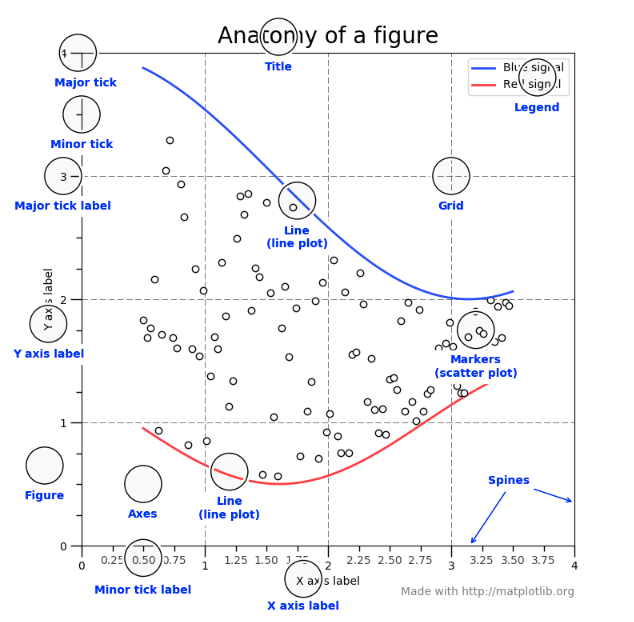

Let's start with a real dataset, the Automobile dataset from Kaggle (https://www.kaggle.com/toramky/automobile-dataset).

This dataset consists of data from 1985 Ward's Automotive Yearbook for some features relating to nearly 200 cars (e.g. the car maker, mileage, dimensions, etc.) and their prices.

In [ ]:
import requests
url = "https://raw.githubusercontent.com/SP9144/FMML_Data/main/Automobile_data.csv"
response = requests.get(url)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from io import StringIO
import matplotlib.pyplot as plt


In [ ]:
# Loading the dataset
data = StringIO(response.text)
data = pd.read_csv(data)
print("Number of data points =", len(data))
data.head()

Number of data points = 205


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
# Removing rows which have missing values
data.replace("?", np.nan, inplace=True)
data = data.dropna()
print("Number of data points after removing missing values =", len(data))


Number of data points after removing missing values = 159


In [ ]:
# Dividing the dataset into features (X) and the target variable (y)
X = data.drop("price", axis=1)
y = pd.to_numeric(data["price"])


To begin with let's see the plot for Car making company on the X-axis and the price of the car on the Y-axis.

To do this, we use matplotlib.pyplot's scatter() function to create a Scatter Plot for the same.

As far as Machine learning/Data Science is concerned, one of the most commonly used plot for simple data visualization is scatter plots. This plot gives us a representation of where each points in the entire dataset are present with respect to any 2/3 features (columns). Scatter plots are available in 2-D as well as 3D . The 2-D scatter plot is the important/common one, where we will primarily find patterns/clusters and separability of the data. The code snippet for using a scatter plot is as shown below.

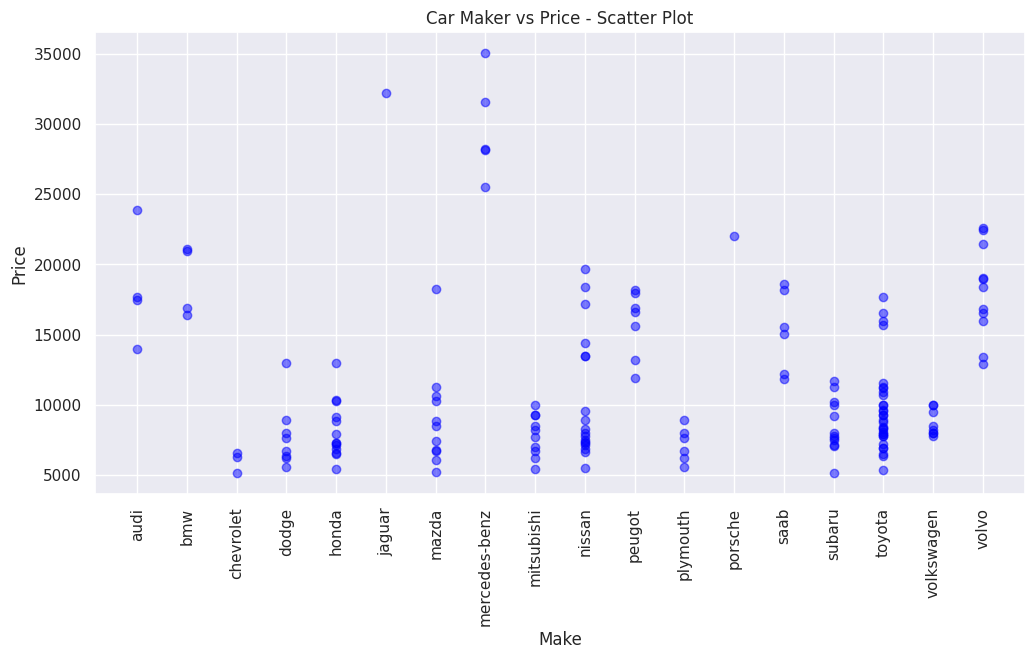

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(X["make"], y, color='blue', alpha=0.5)
plt.xlabel('Make')
plt.ylabel('Price')
plt.title('Car Maker vs Price - Scatter Plot')
plt.xticks(rotation=90)
plt.show()


Even though the scatter plot clearly shows that some car makers like Mercedes-benz, Jaguar, Porsche and BMW keep their cars on the higher side of the price range. But is there a better way to understand the distribution of cars within these companies as well?

To do this, we will use the Seaborn package. Seaborn is a Python data visualization library based on matplotlib.

We will be creating a Box Plot. This is the type of plot that can be used to obtain more of the statistical details about the data. The straight lines at the maximum and minimum are also called as whiskers. Points outside of whiskers will be inferred as an outliers. The box plot gives us a representation of 25th, 50th ,75th quartiles. From a box plot we can also see the Interquartile range(IQR) where maximum details of the data will be present. It also gives us a clear overview of outlier points in the data.

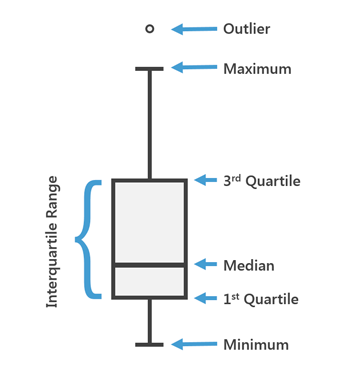

<ipython-input-15-a2a642f97b62>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X["make"], y=y, palette="coolwarm").set_title('Car Manufacturer vs Price - Box Plot')


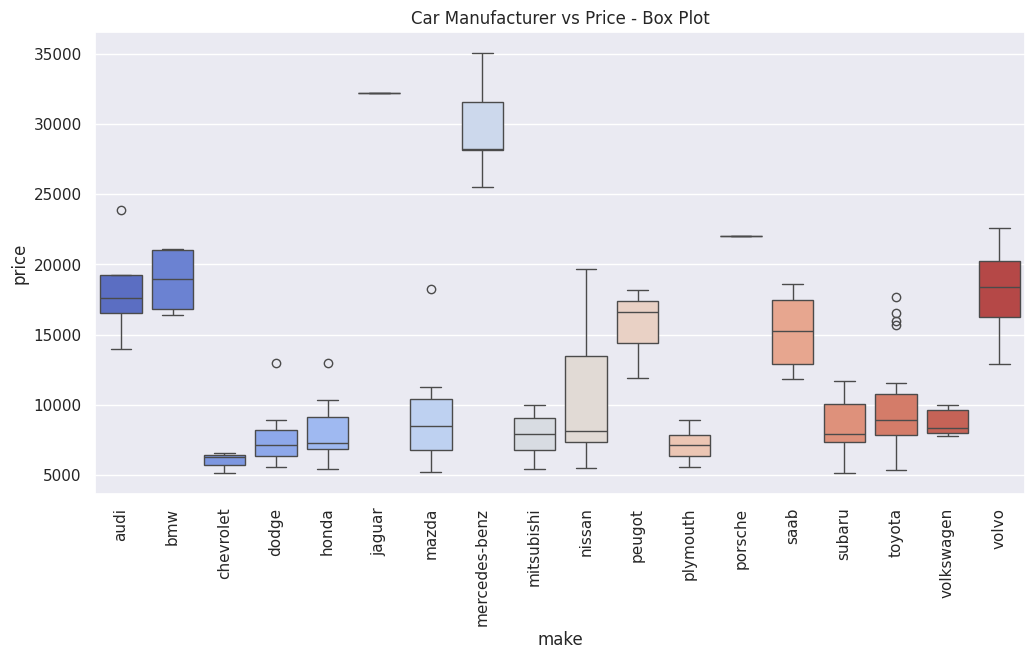

In [ ]:
sns.set(rc={'figure.figsize': (12, 6)})
sns.boxplot(x=X["make"], y=y, palette="coolwarm").set_title('Car Manufacturer vs Price - Box Plot')
plt.xticks(rotation=90)
plt.show()

It becomes evidently clear that Mercedes-Benz, Jaguar and Porsche have the costliest cars. BMW too has costly cars but the large interquartile range suggests that the company has a broader range of cars in the market. The outliers are also important as for example, Mazda has a car listed much higher than its normal price range.

All of these conclusions could be very hard to get to using the data in a tabular format, whereas it became evidently clear straight away once we used Visualization techniques to understand the dataset.

You can also use a Violin Plot to understand the distribution within each car maker in a better way. These violin plots can be inferred as a combination of Box plot at the middle and distribution plots (Kernel Density Estimation) on both side of the data. This can give us the details of distribution like whether the distribution is mutimodal, its skewness etc. It also give us useful information like the 95% confidence interval. The below image can help us grasp some important parts from a violin plot.


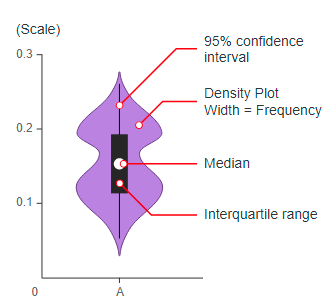

<ipython-input-16-e590cd7a8e88>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=X["make"], y=y, palette="viridis").set_title('Car Maker vs Price - Violin Plot')


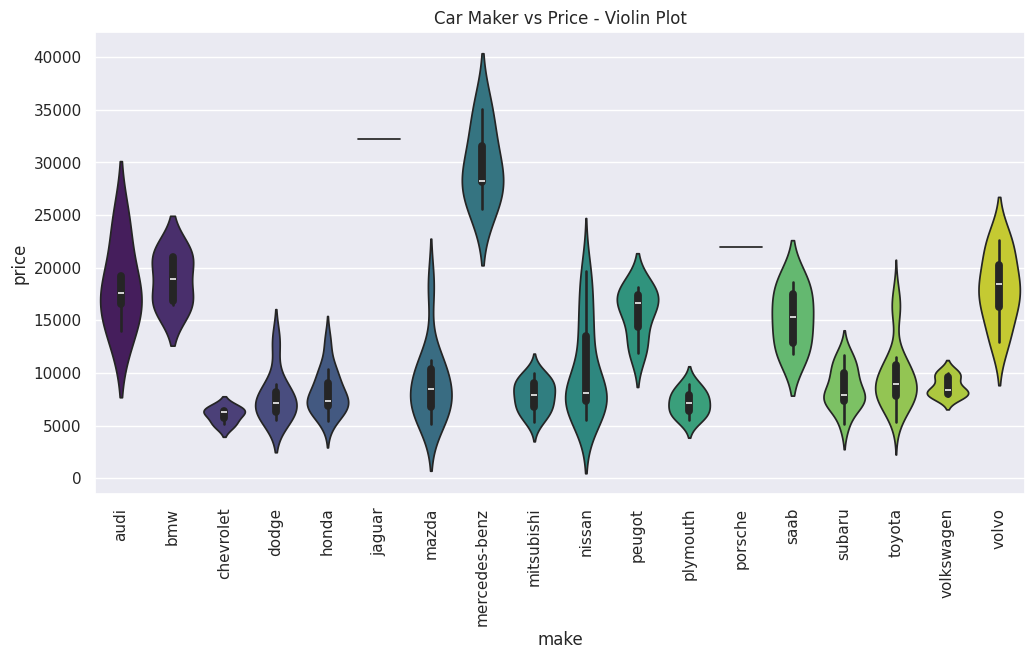

In [ ]:
sns.violinplot(x=X["make"], y=y, palette="viridis").set_title('Car Maker vs Price - Violin Plot')
plt.xticks(rotation=90)
plt.show()

Another plot type are the Swarm Plots. They offer an alternate way of plotting the distribution of an attribute or the joint distribution of a couple of attributes. Unlike strip plots, swarm plots attempt to avoid obscuring points by calculating non-overlapping positions instead of adding random jitter. This sort of gives them appearance of a swarm of bees, or perhaps a honeycomb.

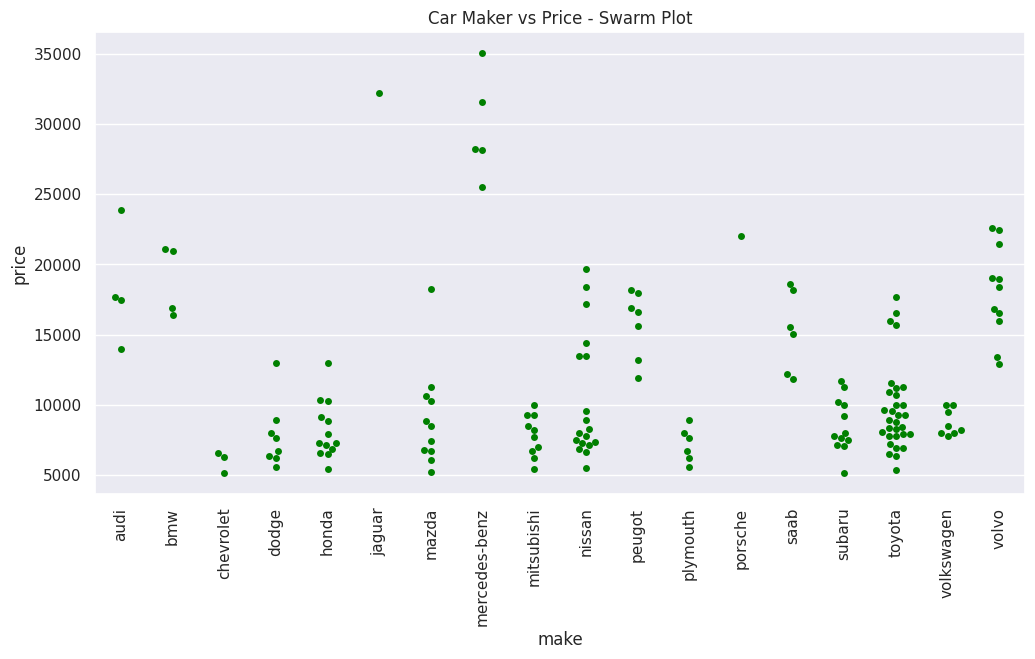

In [ ]:
sns.swarmplot(x=X["make"], y=y, color='green').set_title('Car Maker vs Price - Swarm Plot')
plt.xticks(rotation=90)
plt.show()

Now let us try to learn a bit more about the various features in our dataset. One of the features is Horsepower, used to describe the power that an engine is capable of producing. A sensible assumption could be that Sport car companies like Porsche would have more cars with higher horsepowers. Lets check if this is actually true ...

<ipython-input-18-8d3af260c474>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X["make"], y=pd.to_numeric(X["horsepower"]), palette="coolwarm").set_title('Car Maker vs Horsepower Box Plot')


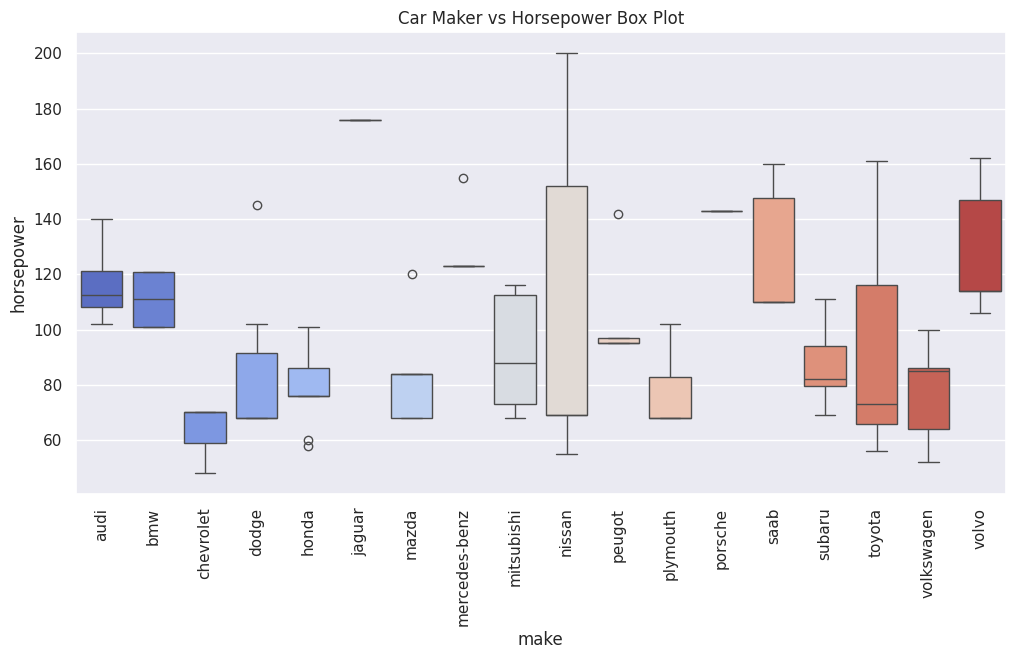

In [ ]:
sns.boxplot(x=X["make"], y=pd.to_numeric(X["horsepower"]), palette="coolwarm").set_title('Car Maker vs Horsepower Box Plot')
plt.xticks(rotation=90)
plt.show()

As expected carmakers like Jaguar and Porsche have most of their cars with very high HP. A reasonable next step would be to see, if this new interesting feature has some correlation with our target variable "price".

A simple way to check this is to again plot a scatterplot (but this time lets do this using Seaborn instead of Matplotlib).

An expected positive correlation should show up with most of the points lying around a line with a positive slope.

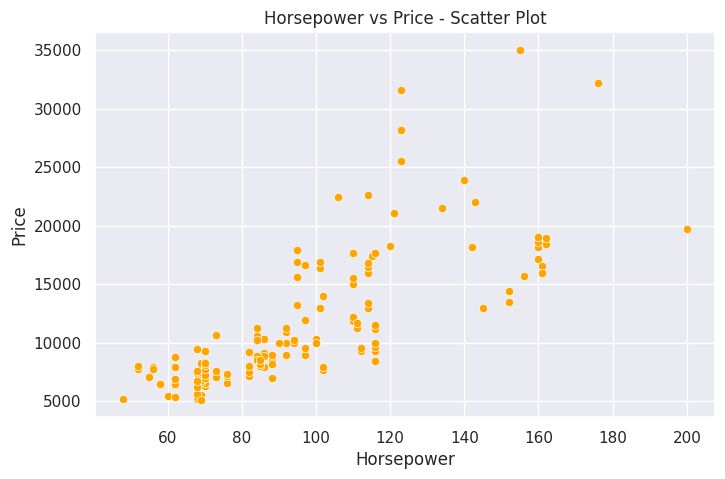

In [ ]:
sns.set(rc={'figure.figsize': (8, 5)})
sns.scatterplot(x=pd.to_numeric(X["horsepower"]), y=y, color="orange")
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Horsepower vs Price - Scatter Plot')
plt.show()


A better way of plotting these correlations is using a Jointplot instead of a simple scatter plot. The jointplot displays a relationship between 2 variables (bivariate) as well as 1D profiles (univariate) in the margins.

I have also used the parameter "reg" which fits a regression line through the points making the correlation sign apparent. A line with positive slope would indicate a postiive correlation and vice versa. A line parallel to x-axis would indicate no correlation between the 2 variables (implying independence).

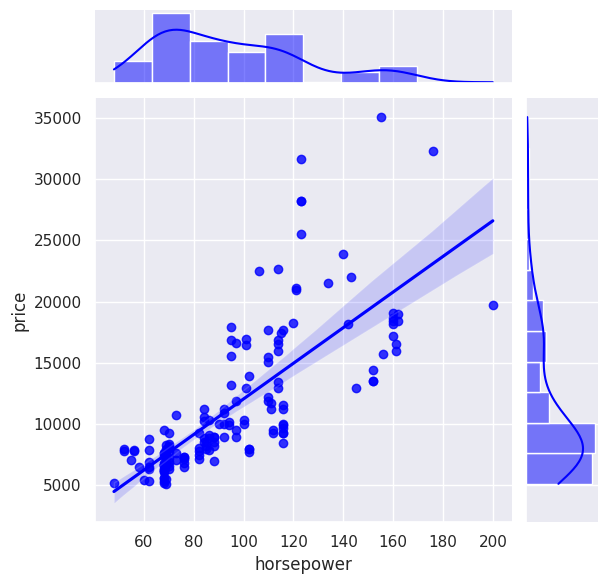

In [ ]:
sns.jointplot(x=pd.to_numeric(X["horsepower"]), y=y, kind="reg", color='blue')
plt.show()

## Exercise: Plot the jointplot for a feature which has negative correlation with the target variable "price".

An example is shown below, with "highway-mpg" where MPG is miles per gallon.

### Hint: You should be using numeric features. The numeric features in the data are listed below:

'symboling', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg'

#### You are motivated to try all of these features to better understand the dataset

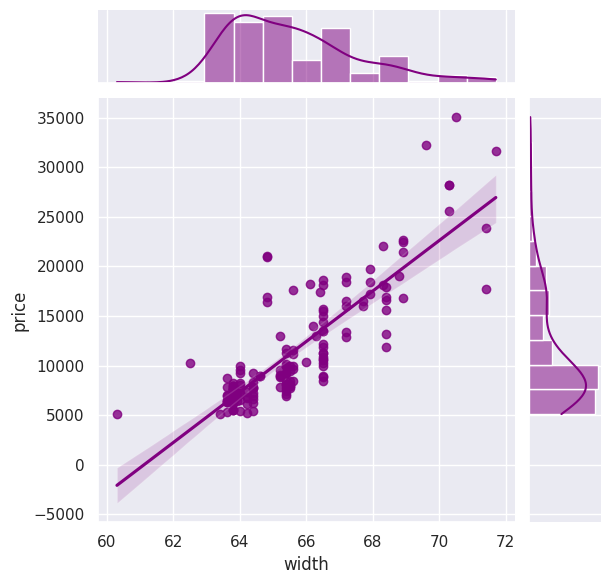

In [ ]:
############################
### CHANGE THE CODE HERE ###

feature = "width"  # Changed feature to "width"

############################

sns.jointplot(x=pd.to_numeric(X[feature]), y=y, kind="reg", color='purple')
plt.show()


## Question: Interpret the plot below. List all the interpretations point by point using the plot below.

Some pointers:

1) Think about the maximum/minimum values for each body-type, which body-type is the "costliest" ?

2) Do you think maximum/minimum values are a clear indication of which body-type is costliest, or does the interpretation improve by also taking the interquartile range into consideration?

3) Do you think the body-style of a car can be a good predictor for its price?


<ipython-input-22-4ed655faf957>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X["body-style"], y=y, palette="viridis").set_title('Body Style vs Price Box Plot')


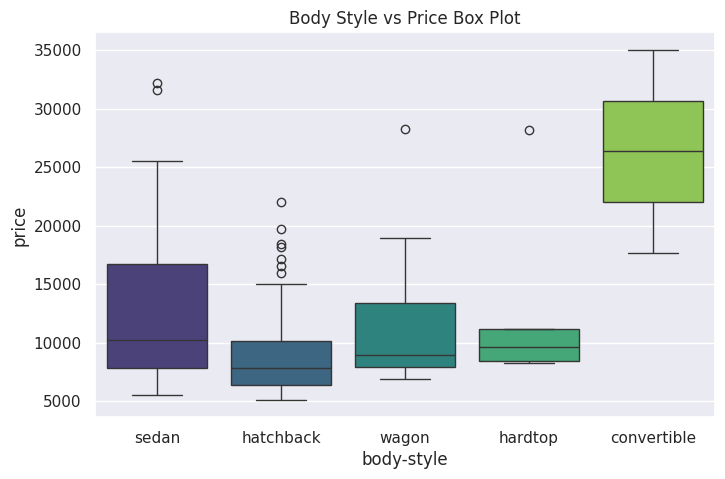

In [ ]:
sns.boxplot(x=X["body-style"], y=y, palette="viridis").set_title('Body Style vs Price Box Plot')
plt.show()


### Exercise
1. Plotting multiple plots together: Search for information about plt.subplots(). Choose any 2 plot types from the ones discussed above and plot them together in a single figure using subplots.
2. Go through the Seaborn documentation and find a plot type that has not been demonstrated in the examples above. Use this new plot type to represent the above data in a meaningful way.

Exercise
1) Plotting multiple plots together: Search for information about plt.subplots(). Choose any 2 plot types from the ones discussed above and plot them together in a single figure using subplots.

<ipython-input-30-7cb6752fd853>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




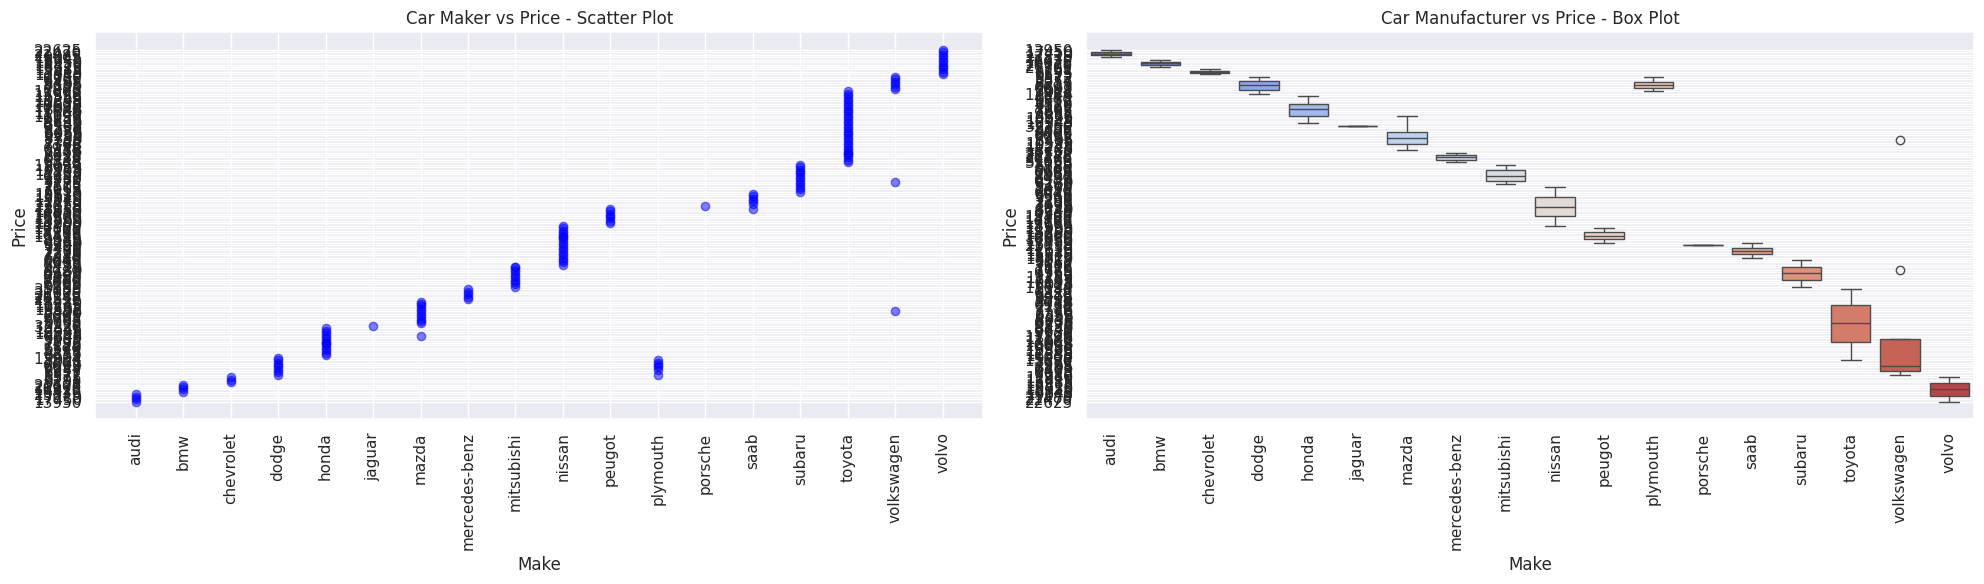

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

axes[0].scatter(X["make"], y, color='blue', alpha=0.5)
axes[0].set_xlabel('Make')
axes[0].set_ylabel('Price')
axes[0].set_title('Car Maker vs Price - Scatter Plot')
axes[0].tick_params(axis='x', rotation=90)

sns.boxplot(x=X["make"], y=y, palette="coolwarm", ax=axes[1]).set_title('Car Manufacturer vs Price - Box Plot')
axes[1].set_xlabel('Make')
axes[1].set_ylabel('Price')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


Exercise 2) Go through the Seaborn documentation and find a plot type that has not been demonstrated in the examples above. Use this new plot type to represent the above data in a meaningful way.

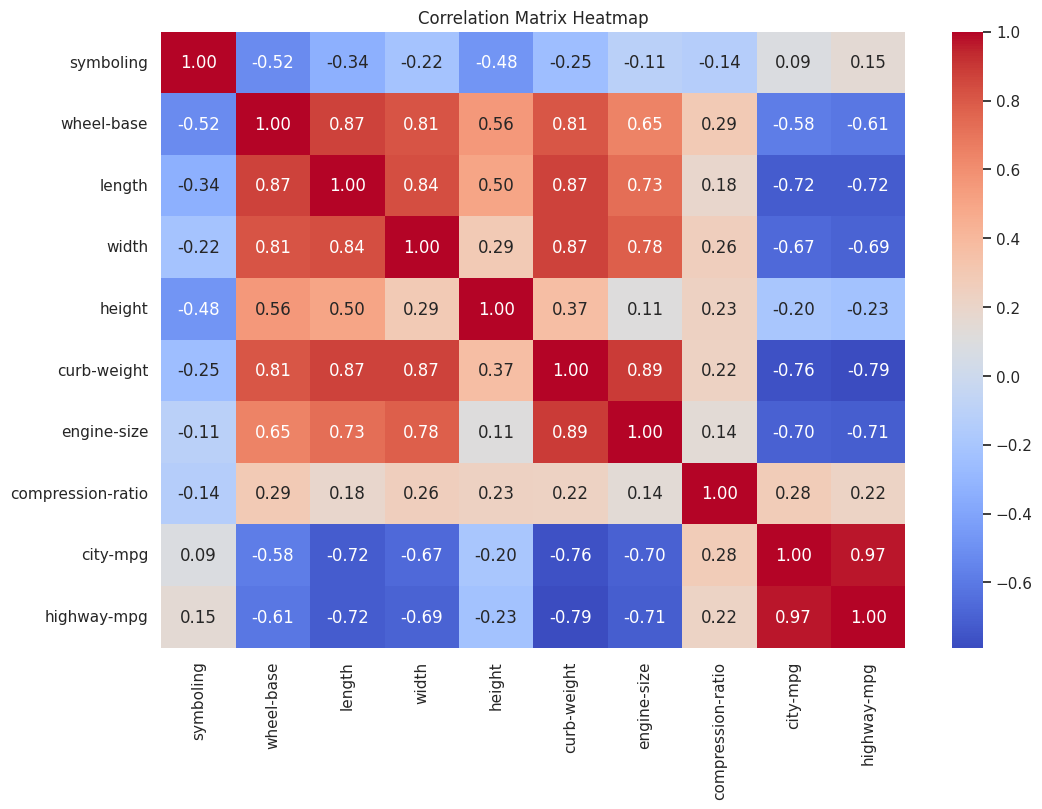

In [ ]:
numerical_data = data.select_dtypes(include=['number'])

corr = numerical_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

Some interesting references:


1) https://towardsdatascience.com/data-visualization-using-matplotlib-16f1aae5ce70

2) https://towardsdatascience.com/data-visualization-for-machine-learning-and-data-science-a45178970be7


3) https://towardsdatascience.com/matplotlib-seaborn-basics-2bd7b66dbee2








Questions & Answers

 1) Think about the maximum/minimum values for each body-type, which body-type is the "costliest" ?

Sedan: For Q3 = 17,000, the maximum value is -32.25k.

In reverse: Q3 = max of 10,000 = 22k


Wagon: maximum 14,000 Q3 = 28.4k

Hardtop: Q3 = 11,000 maximum = 28k

Q3 = 35,000 max = 35,000 is the variable.

Based on the minimum and maximum points, the convertible body type is the "costliest" body type since it has the highest maximum cost of all the other body types, with an upper whisker limit of 35,000.

Remember that when you compare classes based on their minimum and maximum values, these extreme numbers are often outliers. Outliers have the potential to significantly skew our knowledge of the maximum and minimum values.

In [ ]:
import plotly.graph_objects as go
body_styles = X["body-style"].unique()
datai = [y[X["body-style"] == style] for style in body_styles]
traces = []
for i, style in enumerate(body_styles):
    trace = go.Box(
        y=datai[i],
        name=style
    )
    traces.append(trace)
layout = go.Layout(
    title='Body Style vs Price Box Plot',
    xaxis=dict(title='Body Style'),
    yaxis=dict(title='Price')
)
fig = go.Figure(data=traces, layout=layout)
fig.show()


2) Do you think maximum/minimum values are a clear indication of which body-type is costliest, or does the interpretation improve by also taking the interquartile range into consideration?

A larger IQR indicates a greater range of prices. The distribution of cost values among each body type group is clarified by these IQR values.

Maximum and minimum numbers may be impacted by outliers, which could cause them to imprecisely represent the main trend in the data.

As you pointed out, determining which body types—convertible, sedan, wagon, hatchback, and hardtop—are the most costly in a particular situation requires doing the interquartile range (IQR) calculation.

For Sedan, IQR is equal to Q3 - Q1 = 17,000 - 6,000 = 11,000

When it comes to Hatchback, IQR is equivalent to Q3 - Q1 = 10,000 - 5,000: 5,000.

IQR for Wagon is Q3 - Q1 = 14,000 - 8,000 = 6,000.

About Hardtop: Q3 - Q1 = 11,000 - 8,000 = 3,000 is the IQR.

For a convertible, the first IQR is Q3 - Q1 = 35,000 - 17,000 = 18,000).

Some interesting references:

1] https://towardsdatascience.com/data-visualization-using-matplotlib-16f1aae5ce70

2] https://towardsdatascience.com/data-visualization-for-machine-learning-and-data-science-a45178970be7

3] https://towardsdatascience.com/matplotlib-seaborn-basics-2bd7b66dbee2

In [ ]:
#3 Do you think the body-style of a car can be a good predictor for its price?
data_cat=data.select_dtypes(include=['object','category'])
data_num=data.select_dtypes(exclude=['object'])
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [ ]:
data.price.nunique()

145

In [ ]:
data_num.columns

Index(['symboling', 'wheel-base', 'length', 'width', 'height', 'curb-weight',
       'engine-size', 'compression-ratio', 'city-mpg', 'highway-mpg'],
      dtype='object')

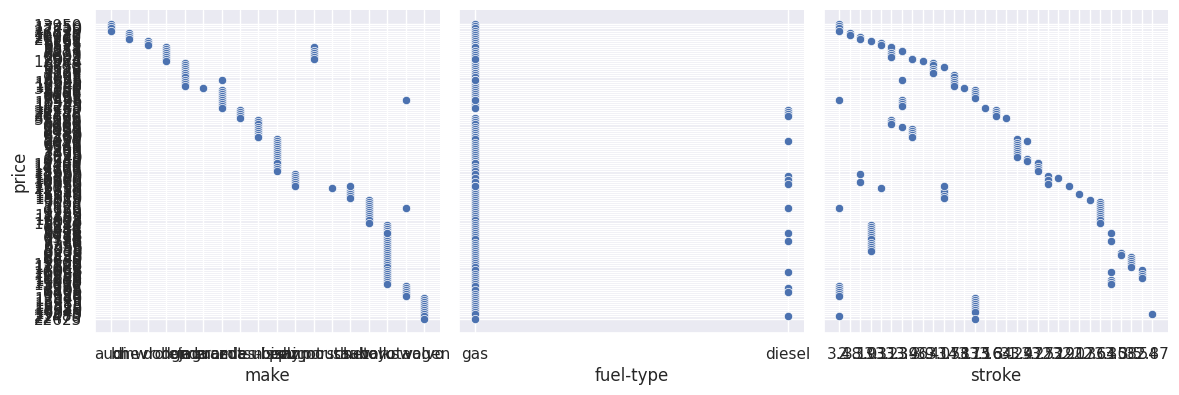

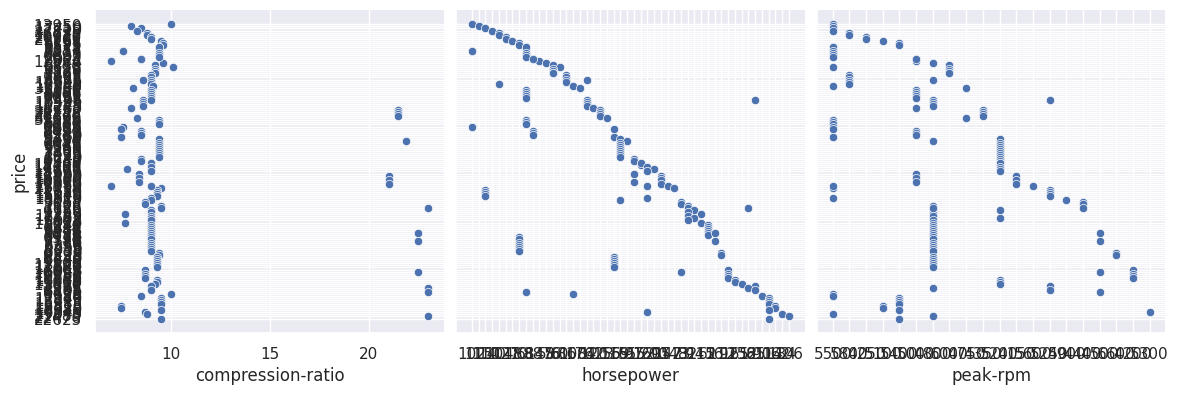

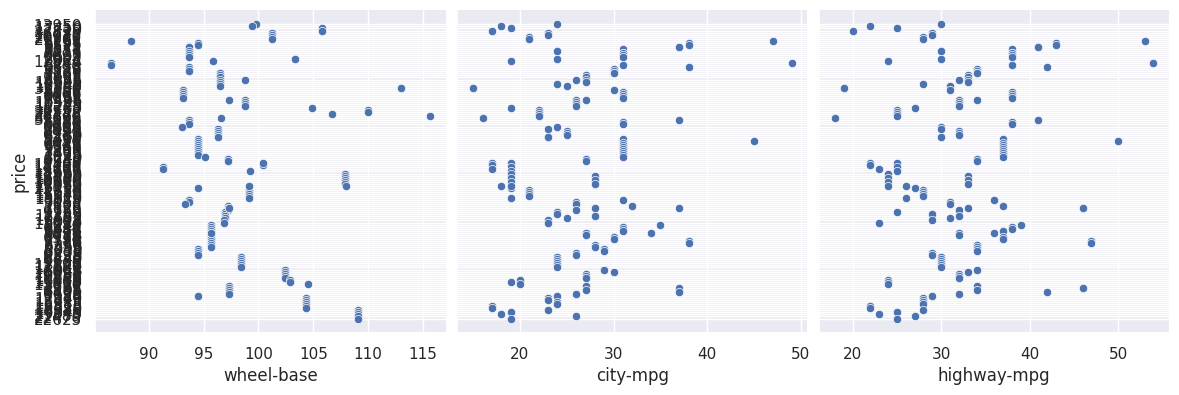

In [ ]:
def pp(x,y,z):
    sns.pairplot(data, x_vars=[x,y,z], y_vars='price',height=4, aspect=1, kind='scatter')
    plt.show()

pp('make','fuel-type',  'stroke')
pp('compression-ratio', 'horsepower', 'peak-rpm')
pp('wheel-base', 'city-mpg', 'highway-mpg')

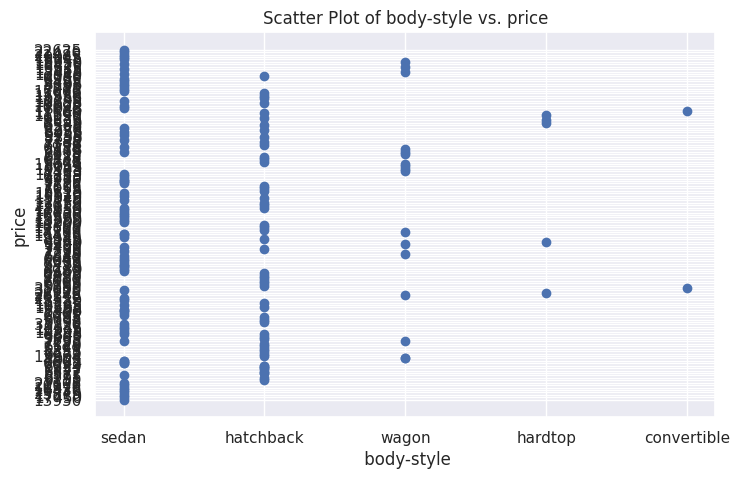

In [ ]:
import matplotlib.pyplot as plt

x = data['body-style']
y = data['price']

plt.scatter(x, y)
plt.xlabel(' body-style')
plt.ylabel('price')
plt.title('Scatter Plot of body-style vs. price')
plt.show()


3) Do you think the body-style of a car can be a good predictor for its price?

Although other factors like horsepower, stroke, and the vehicle's brand or manufacturer are likely more significant as price indications, a car's body design may have an impact on its price.

Because these characteristics have a linear relationship with the price of the car, preliminary study suggests that these factors are more important in deciding pricing. To be more specific, more bivariate and multivariate analyses are required to determine the influence of body style.

These analyses enable one to ascertain whether body style has a significant prediction value for car costs by calculating the relative contributions of various components.

To conclude on the predictive potential of body type in relation to car price prediction, a thorough analysis taking into account all pertinent variables must be performed.